# Data exporation for Osnaca Data Set

## Data Pre-handling

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline
os.getcwd()

'/Users/xiaohan/Documents/CMProject'

### Load Data

In [9]:
osnaca = pd.read_excel('Data/OSNACA/osnaca-data.xlsx',sheet_name="Data")
osnaca_conclurry = pd.read_excel('Data/OSNACA/osnaca-data.xlsx',sheet_name="Cloncurry Supplement")
osnaca_pges = pd.read_excel('Data/OSNACA/osnaca-data.xlsx',sheet_name="PGEs")
osnaca_meta = pd.read_excel('Data/OSNACA/osnaca-metadata.xlsx')

### Merge Tables

In [10]:
set(osnaca.columns).difference(set(osnaca_conclurry.columns))

{'Au (AR)', 'Au (FA)', 'Wt Tot'}

In [11]:
set(osnaca_conclurry.columns).difference(set(osnaca.columns))

{'Au(AR)', 'Au1', 'Code Tester', 'Wt Total'}

In [17]:
osnaca_conclurry.columns

Index(['Sample', 'Code', 'Au1', 'Pt', 'Pd', 'Au(AR)', 'Bi', 'Te', 'Hg', 'Ag',
       'Al', 'As', 'Ca', 'Cd', 'Co', 'Cr', 'Cs', 'Cu', 'Fe', 'In', 'K', 'La',
       'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb',
       'Lu', 'Li', 'Mg', 'Mn', 'Mo', 'Na', 'Nb', 'Ni', 'P', 'Pb', 'Rb', 'Re',
       'S', 'Sb', 'Sc', 'Se', 'Sn', 'Sr', 'Ta', 'Th', 'Ti', 'Tl', 'U', 'V',
       'W', 'Y', 'Zn', 'B', 'Hf', 'Si', 'Zr', 'Be', 'Ga', 'Ge', 'Wt Total'],
      dtype='object')

In [18]:
osnaca_conclurry = osnaca_conclurry.rename(columns={"Wt Total": "Wt Tot", "Au(AR)": "Au (AR)", "Au1": "Au (FA)"})

In [20]:
osnaca_all = pd.concat([osnaca, osnaca_conclurry])

### Data preview

In [21]:
osnaca_all.columns

Index(['Sample', 'Code', 'Au (FA)', 'Pt', 'Pd', 'Au (AR)', 'Bi', 'Te', 'Hg',
       'Ag', 'Al', 'As', 'Ca', 'Cd', 'Co', 'Cr', 'Cs', 'Cu', 'Fe', 'In', 'K',
       'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm',
       'Yb', 'Lu', 'Li', 'Mg', 'Mn', 'Mo', 'Na', 'Nb', 'Ni', 'P', 'Pb', 'Rb',
       'Re', 'S', 'Sb', 'Sc', 'Se', 'Sn', 'Sr', 'Ta', 'Th', 'Ti', 'Tl', 'U',
       'V', 'W', 'Y', 'Zn', 'B', 'Hf', 'Si', 'Zr', 'Be', 'Ga', 'Ge', 'Wt Tot'],
      dtype='object')

In [22]:
osnaca_all.isnull().sum()

Sample       0
Code       994
Au (FA)      0
Pt           0
Pd           0
          ... 
Zr           0
Be           0
Ga           0
Ge           0
Wt Tot     617
Length: 69, dtype: int64

In [23]:
osnaca_all.head()

,Sample,Code,Au (FA),Pt,Pd,Au (AR),Bi,Te,Hg,Ag,...,Y,Zn,B,Hf,Si,Zr,Be,Ga,Ge,Wt Tot
0,700001,NaN,0.438,0.002,0.002,0.362,10.60,0.02,0.39,91.5,...,1.2,153000,-20,0.4,34200,60,-1.0,11.0,1,159
1,700002,NaN,0.093,0.001,0.002,0.095,125.00,0.22,0.12,44.0,...,18.5,3780,-20,0.2,114000,20,-1.0,2.0,-1,143
2,700003,NaN,1.41,0.002,0.002,1.39,120.00,0.02,62.9,215.0,...,0.3,219000,-20,-0.2,71500,-10,-1.0,-1.0,2,204
3,700004,1,0.096,0.003,0.005,0.086,0.72,0.80,0.03,2.5,...,6.3,755,-20,2.0,244000,70,-1.0,-1.0,-1,185
4,700005,NaN,2.9,0.003,0.005,3.94,0.34,0.06,4.01,162.0,...,4.5,173000,-20,-0.2,142000,-10,-1.0,-1.0,2,280


#### Several columns (with data type object) could contain non-numeric values, may need further investigate

In [24]:
osnaca_all.dtypes

Sample      object
Code        object
Au (FA)     object
Pt          object
Pd          object
            ...   
Zr           int64
Be         float64
Ga         float64
Ge           int64
Wt Tot      object
Length: 69, dtype: object

#### Drop less relavent columns

In [47]:
osnaca_all = osnaca_all.drop(['Sample','Code','Wt Tot'], axis = 1)

In [26]:
### Negative values need to be dealt with 

### Nullls

In [49]:
osnaca_all.isnull().sum()

Au (FA)     0
Pt          0
Pd          0
Au (AR)    72
Bi          0
           ..
Si          0
Zr          0
Be          0
Ga          0
Ge          0
Length: 66, dtype: int64

## Correlation Exploration

In [27]:
## Correlated with Zinc

In [28]:
osnaca_all.corr()['Zn'].sort_values(ascending=False) 

Zn    1.000000
Cd    0.640642
Ge    0.496282
S     0.415476
Pb    0.278180
        ...   
Na   -0.184403
Ti   -0.225516
Sc   -0.225709
Al   -0.286780
Si   -0.378327
Name: Zn, Length: 61, dtype: float64

In [29]:
osnaca_all.corr()['Cu'].sort_values(ascending=False) 

Cu    1.000000
S     0.246512
Se    0.205122
In    0.157200
Fe    0.109422
        ...   
K    -0.116469
Na   -0.119540
Ti   -0.131059
Al   -0.179645
Si   -0.197178
Name: Cu, Length: 61, dtype: float64

In [30]:
osnaca_all.corr()['Co'].sort_values(ascending=False) 

Co    1.000000
Ni    0.259981
Fe    0.170675
S     0.165500
Cu    0.065329
        ...   
Ti   -0.062055
Zn   -0.064001
Na   -0.074630
Al   -0.097120
Si   -0.110992
Name: Co, Length: 61, dtype: float64

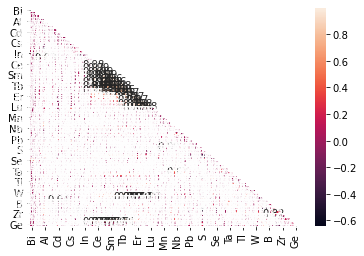

In [31]:
corr = osnaca_all.corr()

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)

# using the upper triangle matrix as mask 
corr_heatmap = sns.heatmap(corr,
            annot=True, 
            mask=matrix, 
           )
plt.yticks(rotation=0)
plt.show()

In [44]:
colormap = sns.color_palette("Blues", as_cmap=True)

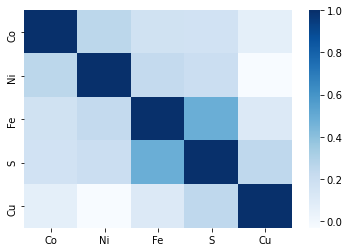

In [45]:
sns.heatmap(osnaca_all[['Co', 'Ni' , 'Fe','S','Cu']].corr(), cmap=colormap);